<a href="https://colab.research.google.com/github/cdstreiff/MAT421---Applied-Computational-Methods/blob/main/MAT421SectionGPart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section G HW - MAT 421
## Part 1
Carson Streiff

### Reimann, Trapezoidal, and Simpson integration
This function my_num_calc solves numerically for the integral of a supplied function over given bounds, in one of the three methods supplied by a user-inputted option.

In [87]:
import numpy as np

def my_num_calc(f,a,b,n,option):

  #establish width of our segments
  h = (b - a) / (n-1)

  #rectangular option
  if(option == 'rect'):
    x = np.linspace(a,b,n)
    y = f(x)
    reimannInt = h * sum(y[1::])
    return reimannInt

  #trapezoidal option
  if(option == 'trap'):
    x = np.linspace(a,b,n)
    y = f(x)
    trapInt = (h/2)*(y[0] + 2*sum(y[1:n-1]) + y[n-1])
    return trapInt

  #simpson's option
  if(option == 'simp'):
    x = np.linspace(a,b,n)
    y = f(x)
    simpInt = (h/3) * (y[0] + 2*sum(y[:n-2:2]) + 4*sum(y[1:n-1:2]) + y[n-1])
    return simpInt

  raise Exception("invalid option")


f = lambda x: np.sin(x)
a = 0
b = np.pi
n = 13
option = 'simp'

my_num_calc(f,a,b,n,option)



2.0000526243411856

### Testing the numerical integration


In [105]:
print("Same problem in each option:")
print("integral of exp(x)sin(x) from -1 to 2, 21 points included")
f = lambda x: np.exp(x) * np.sin(x)
rect = my_num_calc(f,-1,2,21,'rect')
trap = my_num_calc(f,-1,2,21,'trap')
simp = my_num_calc(f,-1,2,21,'simp')

print("rectangular result: " + str(rect))
print("trapezoidal result: " + str(trap))
print("simpson result: " + str(simp))
print("")

print("Increasing accuracy: ")
print("integral of abs(sin(x)) using trapezoidal \n integration from 0 to 2pi, should equal 4")
f = lambda x: abs(np.sin(x))
trap4 = my_num_calc(f,0,2*np.pi,4,'trap')
trap8 = my_num_calc(f,0,2*np.pi,8,'trap')
trap12 = my_num_calc(f,0,2*np.pi,12,'trap')
trap24 = my_num_calc(f,0,2*np.pi,24,'trap')
print("Evaluated with 4 points: " + str(trap4))
print("Evaluated with 8 points: " + str(trap8))
print("Evaluated with 12 points: " + str(trap12))
print("Evaluated with 24 points: " + str(trap24))

Same problem in each option:
integral of exp(x)sin(x) from -1 to 2, 21 points included
rectangular result: 5.685239285070813
trapezoidal result: 5.1581085670897115
simpson result: 5.1200401797192825

Increasing accuracy: 
integral of abs(sin(x)) using trapezoidal 
 integration from 0 to 2pi, should equal 4
Evaluated with 4 points: 3.6275987284684357
Evaluated with 8 points: 3.9326333575317842
Evaluated with 12 points: 3.972773973163315
Evaluated with 24 points: 3.9937790329335323


### Expanded Simpson's Method
This simpson's method uses four points instead of three when fitting a Lagrange curve. This is called Simpson's 3/8 rule, info taken from https://en.wikipedia.org/wiki/Simpson%27s_rule#Simpson's_3/8_rule 

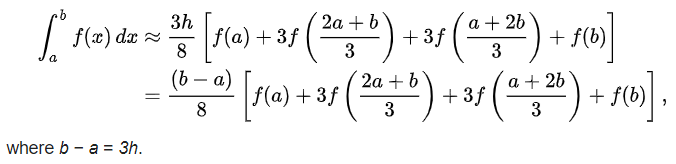
Here is the simplified formula for this technique. It is only valid for functions of data sets split into 4 + 3n points, n being a natural number. Below we test the integral from 0 to 2pi of abs(sin(x)) which should give us 4, and we do this using 31 points (which satisfies both Simpson methods). As we can see, this expanded method can be more accurate than the original method.

In [163]:
def simpson(f,a,b,n):

  #initial quantities
  h = (b - a) / (n-1)
  x = np.linspace(a,b,n)
  y = f(x)

  sum = 0

  
  #since we use four points, we calculate every three points
  for i in range(0,n-3,3):
    

    a1 = i
    b1 = i + 3

    

    point1 = int((2*a1 + b1) / 3)
    point2 = int((a1 + 2*b1) / 3)
    


    sum += (3*h / 8) * (y[a1] + 3*y[point1] + 3*y[point2] + y[b1])


  return sum
    


f = lambda x: abs(np.sin(x))
a = 0
b = np.pi * 2
n = 31
#result should be 4
print("Simpson's 3/8 rule output: ")
print(simpson(f,a,b,n))
print("Regular Simpson's rule output: ")
print(my_num_calc(f,a,b,31,'simp'))

Simpson's 3/8 rule output: 
4.000097221421029
Regular Simpson's rule output: 
3.985367663061538
